# Histogram Analysis - Nurlan Imanov 

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [138]:
# Imagine we have a the image that contains that kind of matrix :
img = np.array([[3,4,14,7,9,5],
                [5,3,12,5,9,0],
                [15,15,14,5,9,0],
                [11,11,10,5,6,0],
                [12,8,0,1,2,1],
                [13,3,0,1,3,5]])
(M,N) = img.shape # Taking 'row' and 'column' sizes


# Occurrence and Probability of each gray level in image

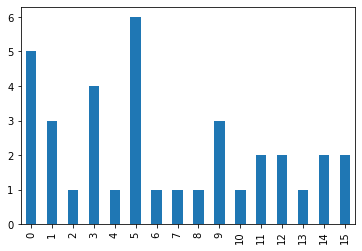

In [32]:
dic = {}
dic['Gray level'] = []
dic['Occurrence'] = []
dic['Probability'] = []
for item in np.unique(img):
    value = np.count_nonzero(img == item) # Function for finding number of occurrence of each value in array
    dic['Gray level'].append(item)
    dic['Occurrence'].append(value)
    dic['Probability'].append((value/(M*N)))

a = pd.DataFrame(dic)
a['Occurrence'].plot.bar(); # The histogram that I ploted myself

# Scatter Plot of these values 

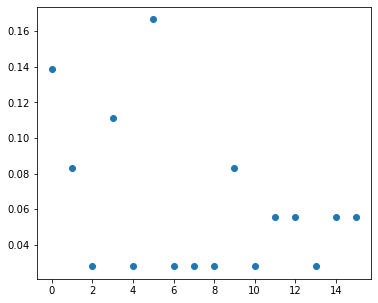

In [33]:
plt.subplots(1,1,figsize=(6,5))
plt.subplot(111)
plt.scatter(dic['Gray level'],dic['Probability'])
plt.show()

# Ground truth Histogram

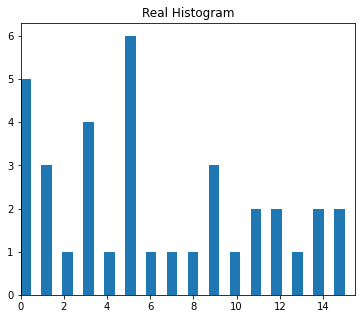

In [34]:
plt.subplots(1,1,figsize=(6,5))
plt.subplot(111)
plt.hist(img.flatten(), bins=31)
plt.xlim([0,15.5])
plt.title("Real Histogram")
plt.show()

# Application on real images

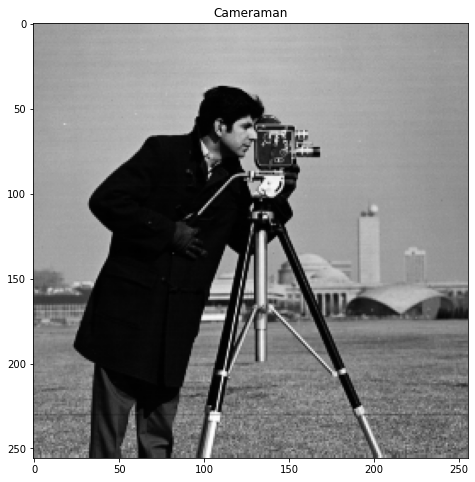

In [35]:
cameraman_img = cv2.imread('cameraman.tif',0)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(cameraman_img,'gray')
plt.title('Cameraman')
plt.show()

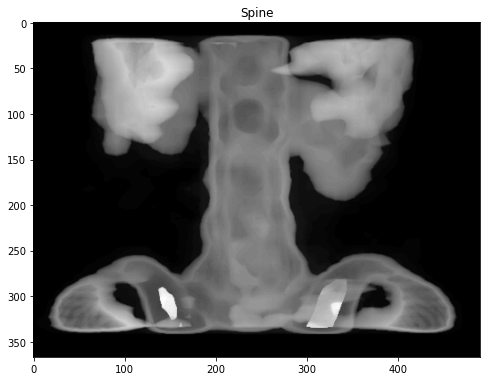

In [36]:
spine_img = cv2.imread('spine.tif',0)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(spine_img,'gray')
plt.title('Spine')
plt.show()

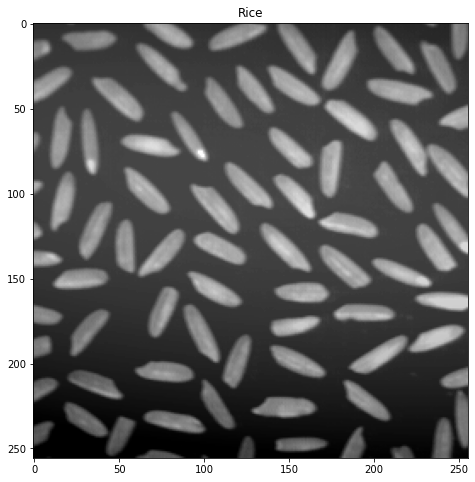

In [37]:
rice_img = cv2.imread('rice.tif',0)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(rice_img,'gray')
plt.title('Rice')
plt.show()

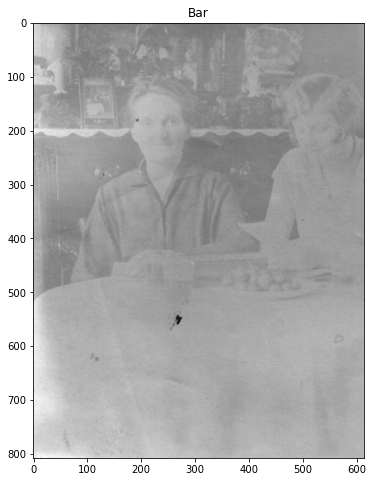

In [38]:
bar_img = cv2.imread('bar.png',0)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(bar_img,'gray')
plt.title('Bar')
plt.show()

# Creating a function that calculates histogram of image

In [39]:
def hist_img(img,max_gray = 255):
    (M,N) = img.shape
    dic = {}
    dic['Gray level'] = []
    dic['Occurrence'] = []
    dic['Probability'] = []
    for item in range(max_gray+1):
        value = np.count_nonzero(img == item) 
        dic['Gray level'].append(item)
        dic['Occurrence'].append(value)
        dic['Probability'].append((value/(M*N)))
    return pd.DataFrame(dic)

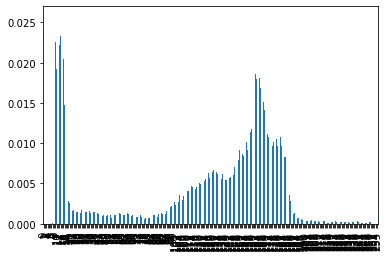

In [40]:
hist_img(cameraman_img)["Probability"].plot.bar();
# We can see from this plot that : Our pixels mostly dark and medium dark

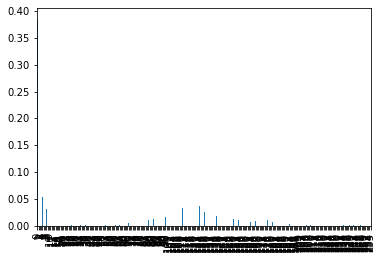

In [41]:
hist_img(spine_img)["Probability"].plot.bar();
# We can see from this plot that : Our pixels mostly dark

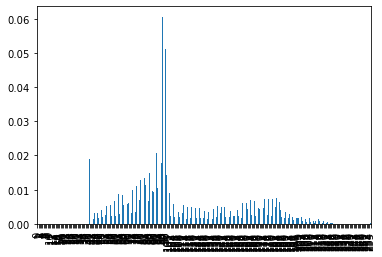

In [42]:
hist_img(rice_img)["Probability"].plot.bar();
# We can see from this plot that : Mostly we have same probability among pixels but also we have some points that
# there is a priority to dark pixels

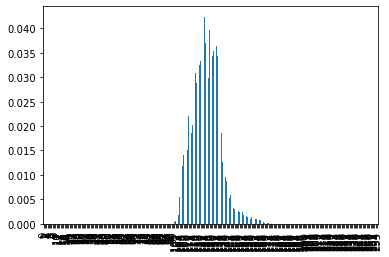

In [43]:
hist_img(bar_img)["Probability"].plot.bar();
# We can see from this plot that : Our pixels mostly bright 

# Comparing my own results with the 'hist' function of Python

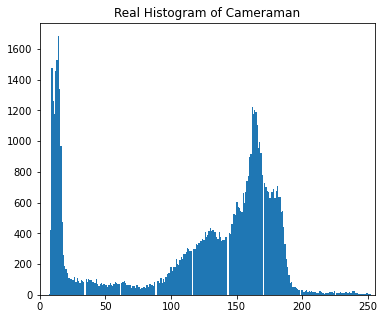

In [44]:
plt.subplots(1,1,figsize=(6,5))
plt.subplot(111)
plt.hist(cameraman_img.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Real Histogram of Cameraman")
plt.show()

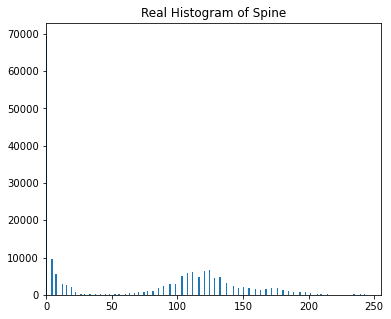

In [45]:
plt.subplots(1,1,figsize=(6,5))
plt.subplot(111)
plt.hist(spine_img.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Real Histogram of Spine")
plt.show()

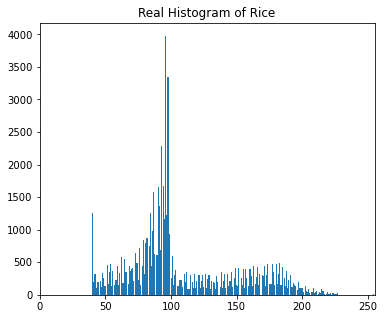

In [46]:
plt.subplots(1,1,figsize=(6,5))
plt.subplot(111)
plt.hist(rice_img.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Real Histogram of Rice")
plt.show()

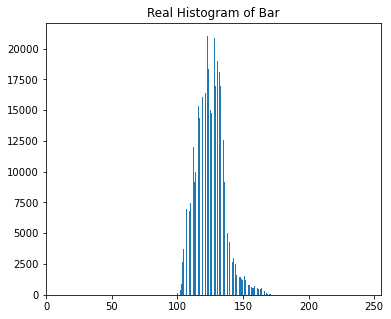

In [47]:
plt.subplots(1,1,figsize=(6,5))
plt.subplot(111)
plt.hist(bar_img.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Real Histogram of Bar")
plt.show()

# Cumilated histogram of images

In [48]:
# Firstly we have to create 'cumilated histogram function' ourselves
def cumilated_hist(img,max_gray = 255):
    (M,N) = img.shape
    dic = {}
    dic['Gray level'] = []
    dic['Occurrence'] = []
    dic['Probability'] = []
    dic['Cumilative_Probability'] = []
    cumilative_prob = 0
    
    for item in range(max_gray+1):
        value = np.count_nonzero(img == item) 
        dic['Gray level'].append(item)
        dic['Occurrence'].append(value)
        dic['Probability'].append((value/(M*N)))
        cumilative_prob += (value/(M*N))
        dic['Cumilative_Probability'].append(cumilative_prob)
        
    return pd.DataFrame(dic)

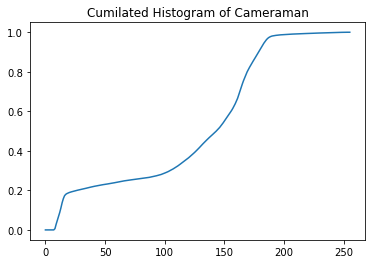

In [49]:
plt.plot(cumilated_hist(cameraman_img)['Cumilative_Probability'])
plt.title('Cumilated Histogram of Cameraman');

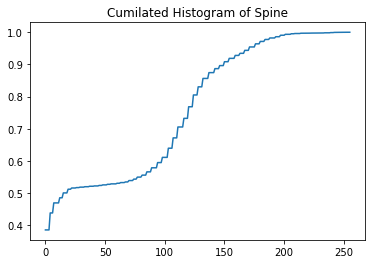

In [50]:
plt.plot(cumilated_hist(spine_img)['Cumilative_Probability'])
plt.title('Cumilated Histogram of Spine');

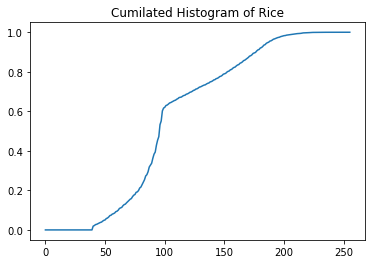

In [51]:
plt.plot(cumilated_hist(rice_img)['Cumilative_Probability'])
plt.title('Cumilated Histogram of Rice');

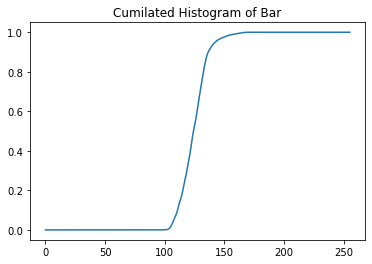

In [52]:
plt.plot(cumilated_hist(bar_img)['Cumilative_Probability'])
plt.title('Cumilated Histogram of Bar');

#      Contrast Enhancement

## Image Binarization 

In [53]:
def binim(img,thr = 50,max_gray = 255):
    
    mask = img>thr # Mask that contains with indexses which are contains pixels which are greater than threshold
    new_img = np.zeros(shape = img.shape) # Creating zero matrix with image size
    new_img[mask] = max_gray # Making 255 the pixels which is greater than threshold
    
    return new_img    

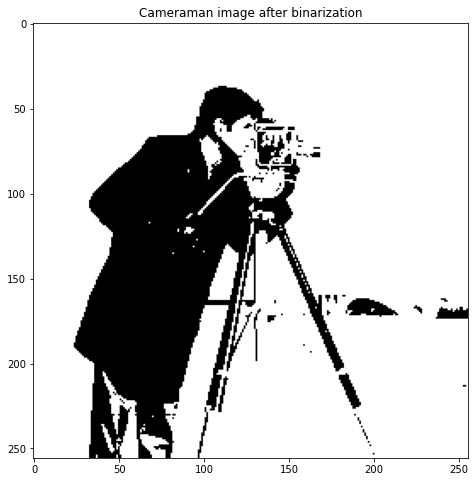

In [54]:
cameraman_bin = binim(cameraman_img)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(cameraman_bin,'gray')
plt.title('Cameraman image after binarization')
plt.show()

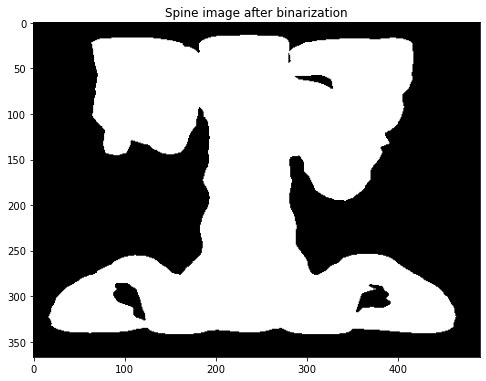

In [55]:
spine_bin = binim(spine_img)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(spine_bin,'gray')
plt.title('Spine image after binarization')
plt.show()

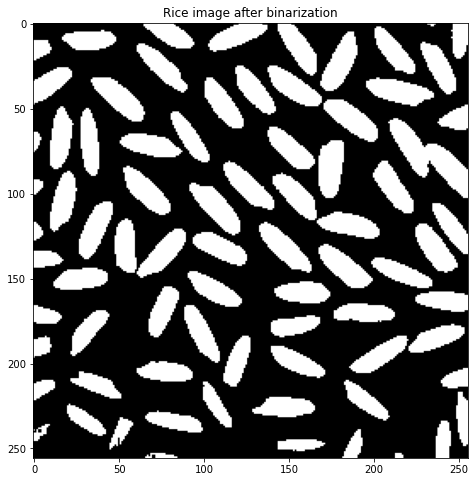

In [56]:
rice_bin = binim(rice_img,110)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(rice_bin,'gray')
plt.title('Rice image after binarization')
plt.show()

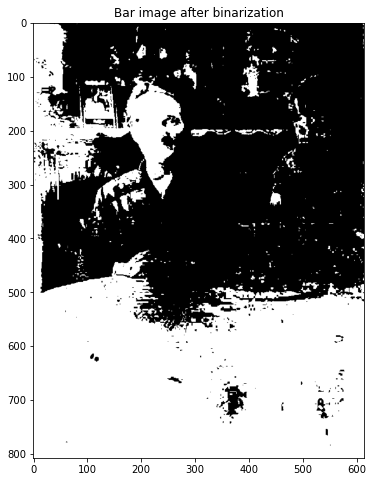

In [57]:
bar_bin = binim(bar_img,125)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(bar_bin,'gray')
plt.title('Bar image after binarization')
plt.show()

# Linear Streching

In [80]:
def rec_dyn(img,a,b):
    min_pix = np.min(img)
    max_pix = np.max(img)
    print(min_pix,max_pix)
    new_img = np.zeros(shape = img.shape)
    
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            new_img[row,column] = int(((img[row,column] - min_pix)/(max_pix - min_pix)) * (b-a) + a)
    min_pix = np.min(new_img)
    max_pix = np.max(new_img)
    print(min_pix,max_pix)
    
    return new_img

7 253
50.0 140.0


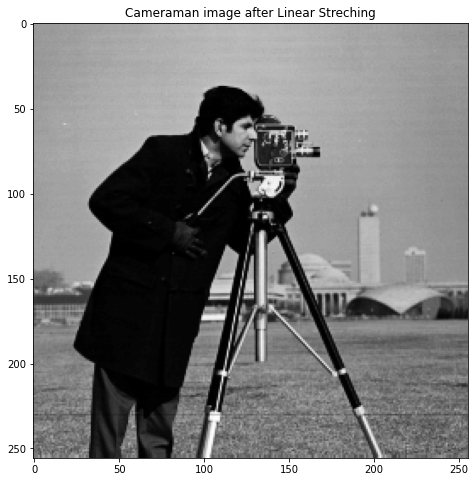

In [81]:
streched_cameraman = rec_dyn(cameraman_img,a = 50 , b = 140)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(streched_cameraman,'gray')
plt.title('Cameraman image after Linear Streching')
plt.show()

0 255
50.0 140.0


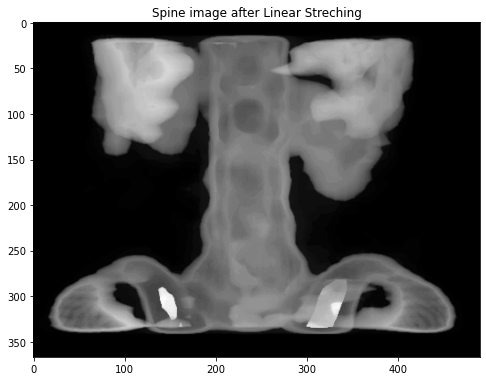

In [84]:
streched_spine = rec_dyn(spine_img,a = 50 , b = 140)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(streched_spine,'gray')
plt.title('Spine image after Linear Streching')
plt.show()

40 255
50.0 140.0


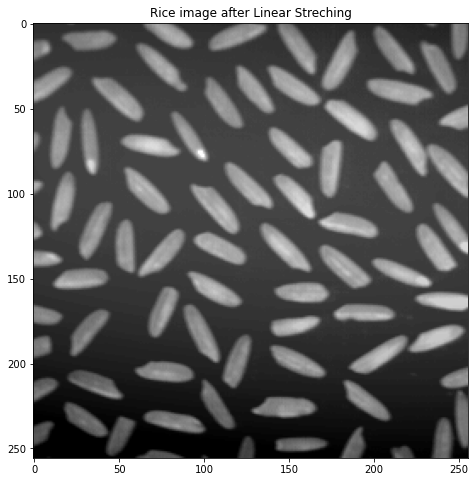

In [85]:
streched_rice = rec_dyn(rice_img,a = 50 , b = 140)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(streched_rice,'gray')
plt.title('Rice image after Linear Streching')
plt.show()

40 175
0.0 255.0


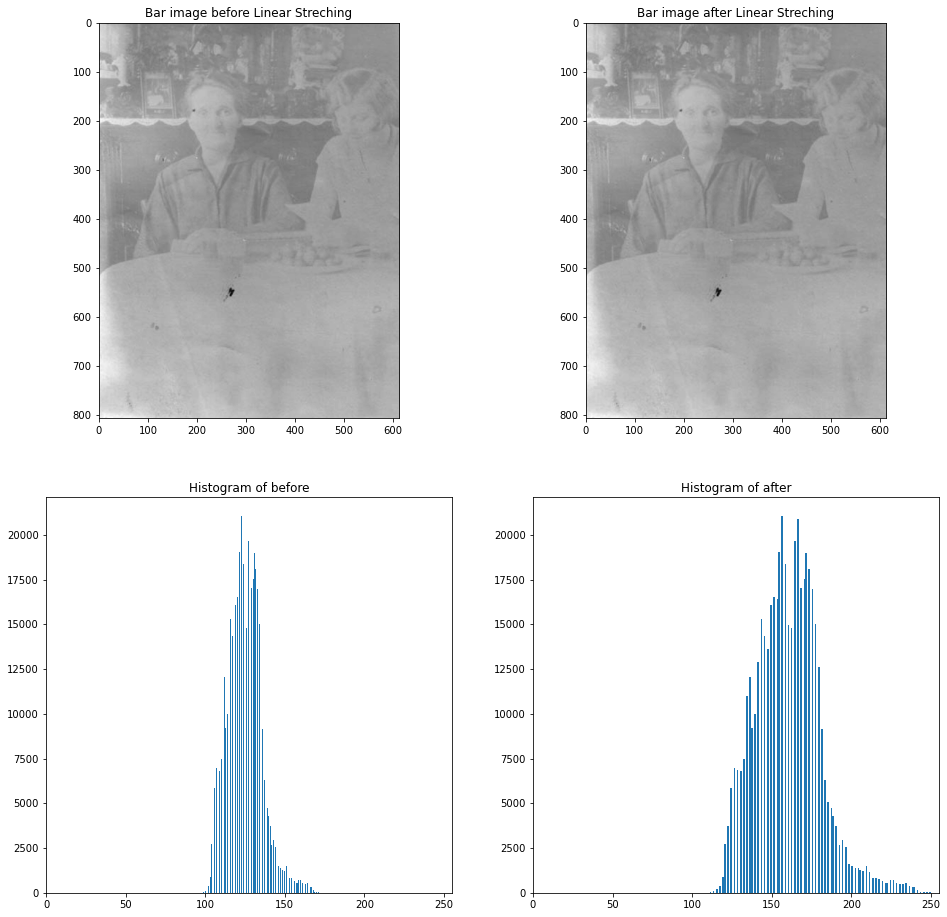

In [96]:
streched_bar = rec_dyn(bar_img,a = 0 , b = 255)
plt.subplots(2,2,figsize=(16,16))
plt.subplot(2,2,2)
plt.imshow(streched_bar,'gray')
plt.title('Bar image after Linear Streching')

plt.subplot(2,2,1)
plt.imshow(bar_img,'gray')
plt.title('Bar image before Linear Streching')

plt.subplot(2,2,3)
plt.hist(bar_img.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of before")

plt.subplot(2,2,4)
plt.hist(streched_bar.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of after")
plt.show()

# Negative of an image


In [102]:
def negim(img):
    new_img = np.zeros(shape= img.shape)
    
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            new_img[row,column] = 255 - img[row,column]
            
    return new_img

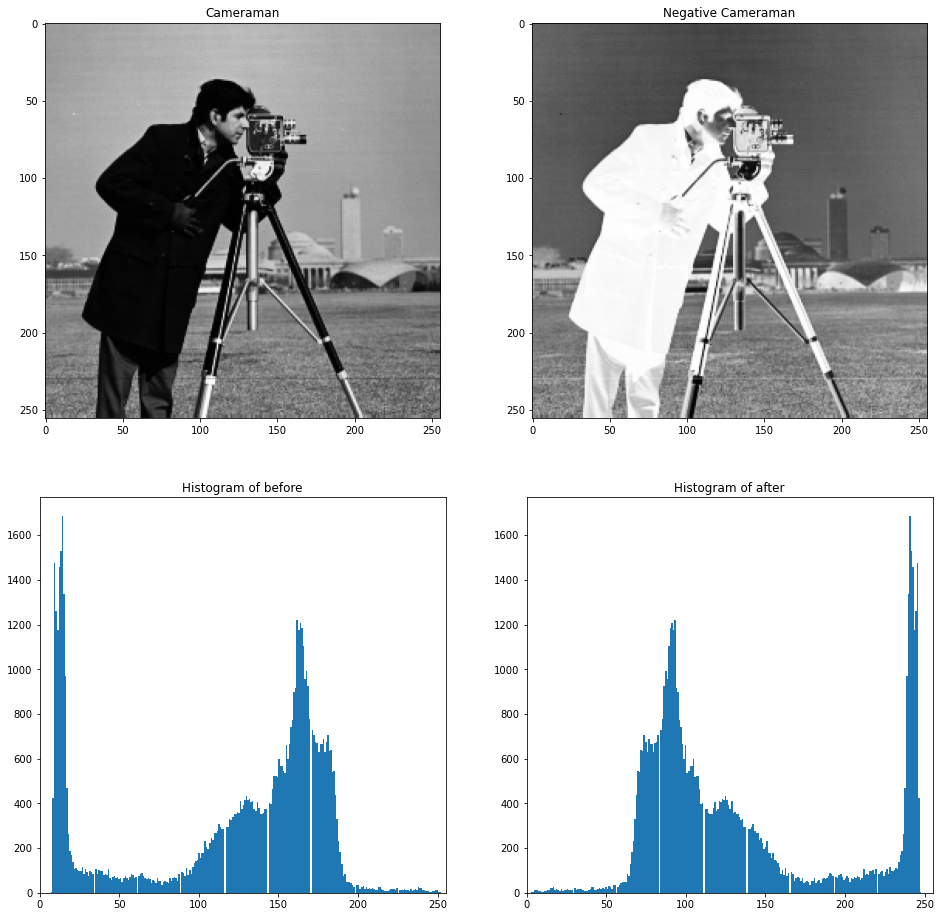

In [108]:
negative_cameraman = negim(cameraman_img)
plt.subplots(2,2,figsize=(16,16))
plt.subplot(2,2,1)
plt.imshow(cameraman_img,'gray')
plt.title('Cameraman')

plt.subplot(2,2,2)
plt.imshow(negative_cameraman,'gray')
plt.title('Negative Cameraman')

plt.subplot(2,2,3)
plt.hist(cameraman_img.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of before")

plt.subplot(2,2,4)
plt.hist(negative_cameraman.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of after")
plt.show()

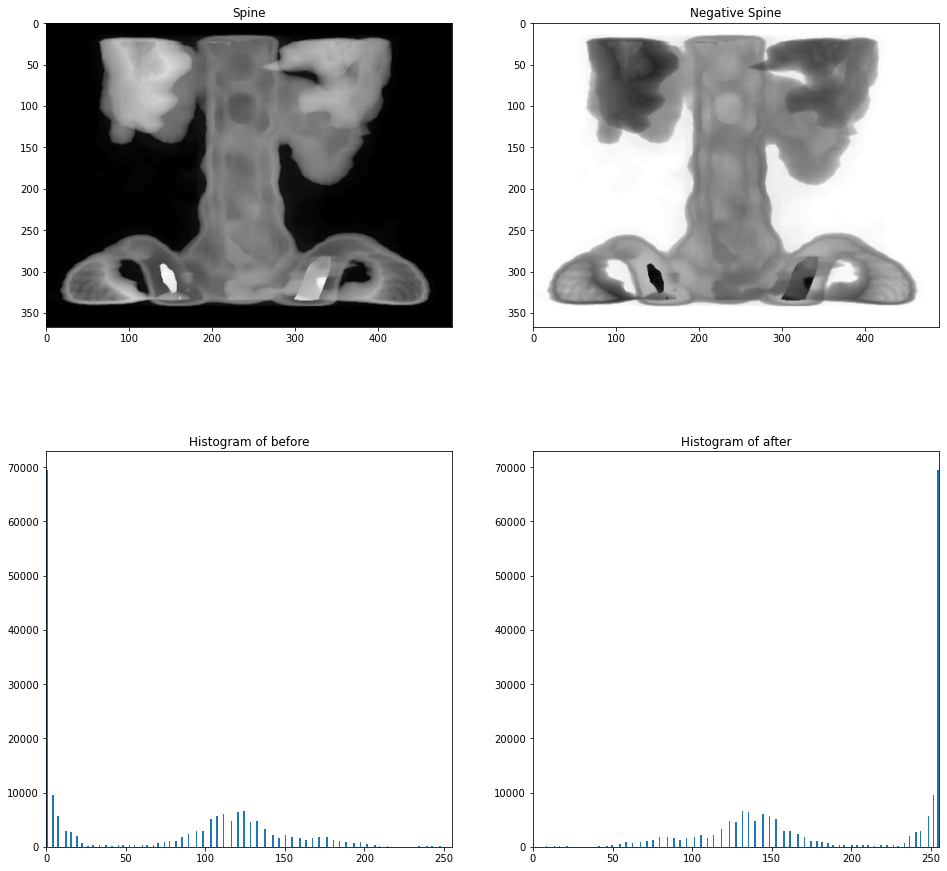

In [109]:
negative_spine = negim(spine_img)
plt.subplots(2,2,figsize=(16,16))
plt.subplot(2,2,1)
plt.imshow(spine_img,'gray')
plt.title('Spine')

plt.subplot(2,2,2)
plt.imshow(negative_spine,'gray')
plt.title('Negative Spine')

plt.subplot(2,2,3)
plt.hist(spine_img.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of before")

plt.subplot(2,2,4)
plt.hist(negative_spine.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of after")
plt.show()

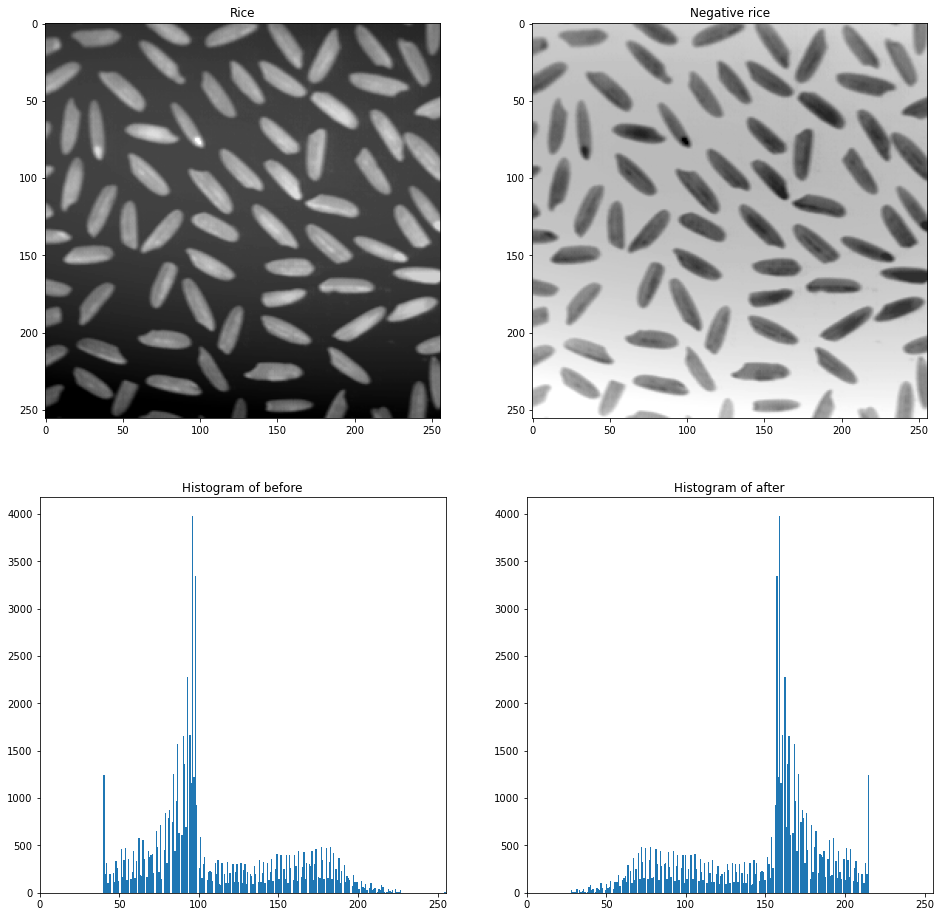

In [110]:
negative_rice = negim(rice_img)
plt.subplots(2,2,figsize=(16,16))
plt.subplot(2,2,1)
plt.imshow(rice_img,'gray')
plt.title('Rice')

plt.subplot(2,2,2)
plt.imshow(negative_rice,'gray')
plt.title('Negative rice')

plt.subplot(2,2,3)
plt.hist(rice_img.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of before")

plt.subplot(2,2,4)
plt.hist(negative_rice.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of after")
plt.show()

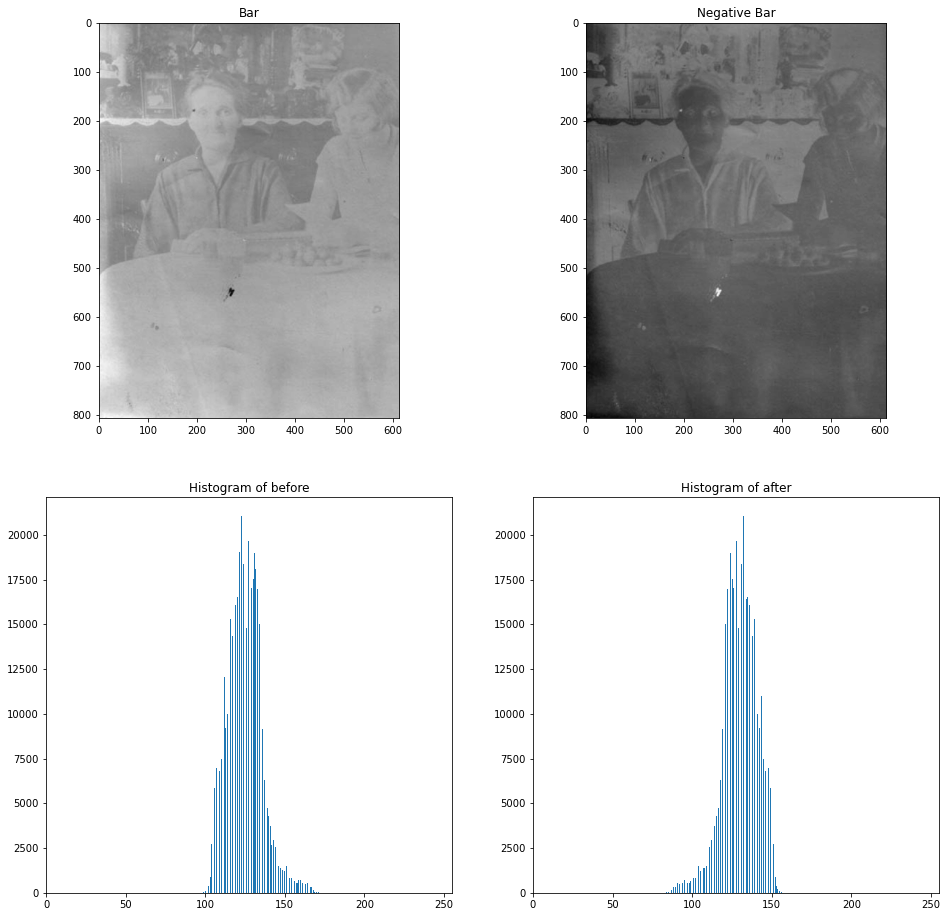

In [111]:
negative_bar = negim(bar_img)
plt.subplots(2,2,figsize=(16,16))
plt.subplot(2,2,1)
plt.imshow(bar_img,'gray')
plt.title('Bar')

plt.subplot(2,2,2)
plt.imshow(negative_bar,'gray')
plt.title('Negative Bar')

plt.subplot(2,2,3)
plt.hist(bar_img.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of before")

plt.subplot(2,2,4)
plt.hist(negative_bar.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of after")
plt.show()

# Contraction of dark areas and dilatation of bright ones

In [112]:
def dil_con(img,a,b):
    new_img = np.zeros(shape = img.shape)
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            if img[row,column] < a :
                new_img[row,column] = int((b/a) * img[row,column])
            else:
                new_img[row,column] = int(((255-b)*img[row,column] + 255*(b-a)) / (255 - a))
    return new_img

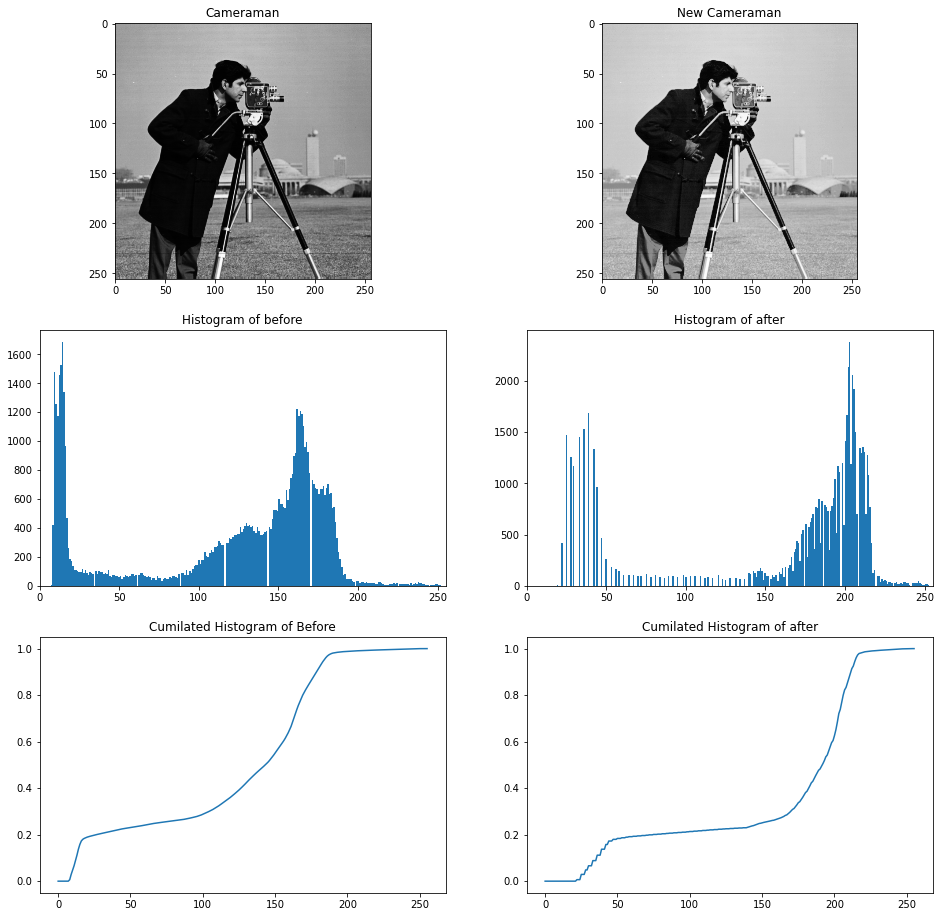

In [115]:
dilcon_cameraman = dil_con(cameraman_img,50,140)
plt.subplots(3,2,figsize=(16,16))
plt.subplot(3,2,1)
plt.imshow(cameraman_img,'gray')
plt.title('Cameraman')

plt.subplot(3,2,2)
plt.imshow(dilcon_cameraman,'gray')
plt.title('New Cameraman')

plt.subplot(3,2,3)
plt.hist(cameraman_img.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of before")

plt.subplot(3,2,4)
plt.hist(dilcon_cameraman.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of after")

plt.subplot(3,2,5)
plt.plot(cumilated_hist(cameraman_img)['Cumilative_Probability'])
plt.title('Cumilated Histogram of Before');

plt.subplot(3,2,6)
plt.plot(cumilated_hist(dilcon_cameraman)['Cumilative_Probability'])
plt.title('Cumilated Histogram of after');

plt.show()

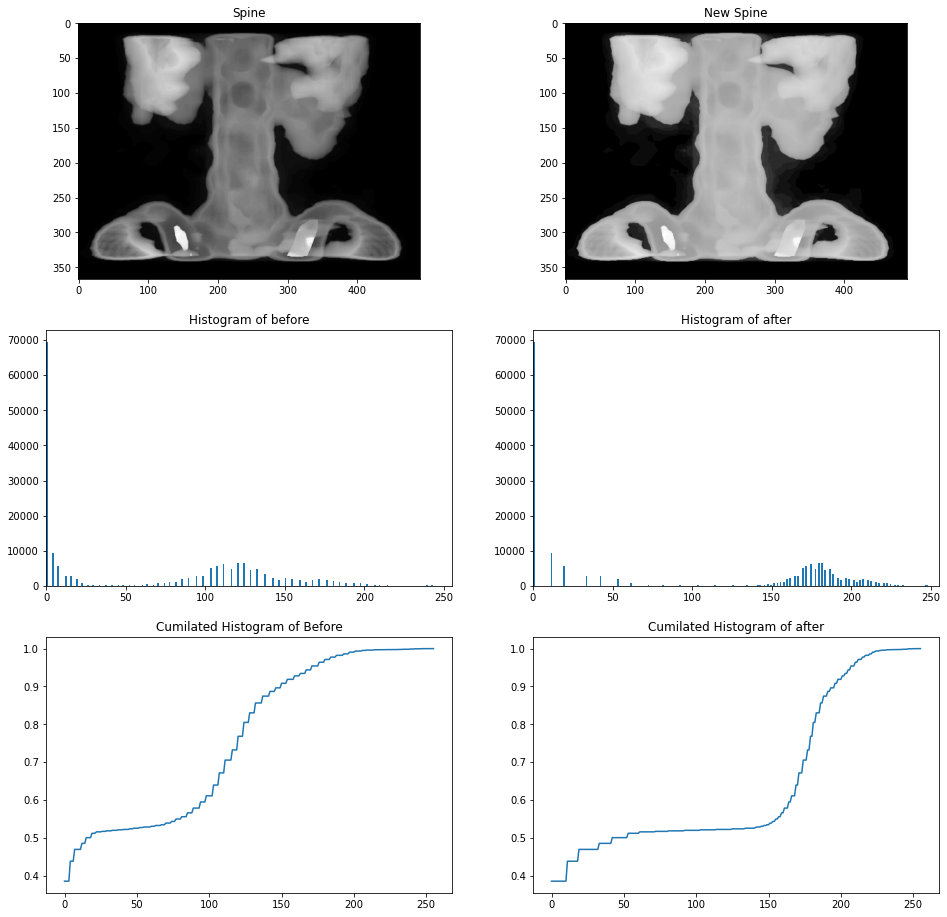

In [116]:
dilcon_spine = dil_con(spine_img,50,140)
plt.subplots(3,2,figsize=(16,16))
plt.subplot(3,2,1)
plt.imshow(spine_img,'gray')
plt.title('Spine')

plt.subplot(3,2,2)
plt.imshow(dilcon_spine,'gray')
plt.title('New Spine')

plt.subplot(3,2,3)
plt.hist(spine_img.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of before")

plt.subplot(3,2,4)
plt.hist(dilcon_spine.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of after")

plt.subplot(3,2,5)
plt.plot(cumilated_hist(spine_img)['Cumilative_Probability'])
plt.title('Cumilated Histogram of Before');

plt.subplot(3,2,6)
plt.plot(cumilated_hist(dilcon_spine)['Cumilative_Probability'])
plt.title('Cumilated Histogram of after');

plt.show()

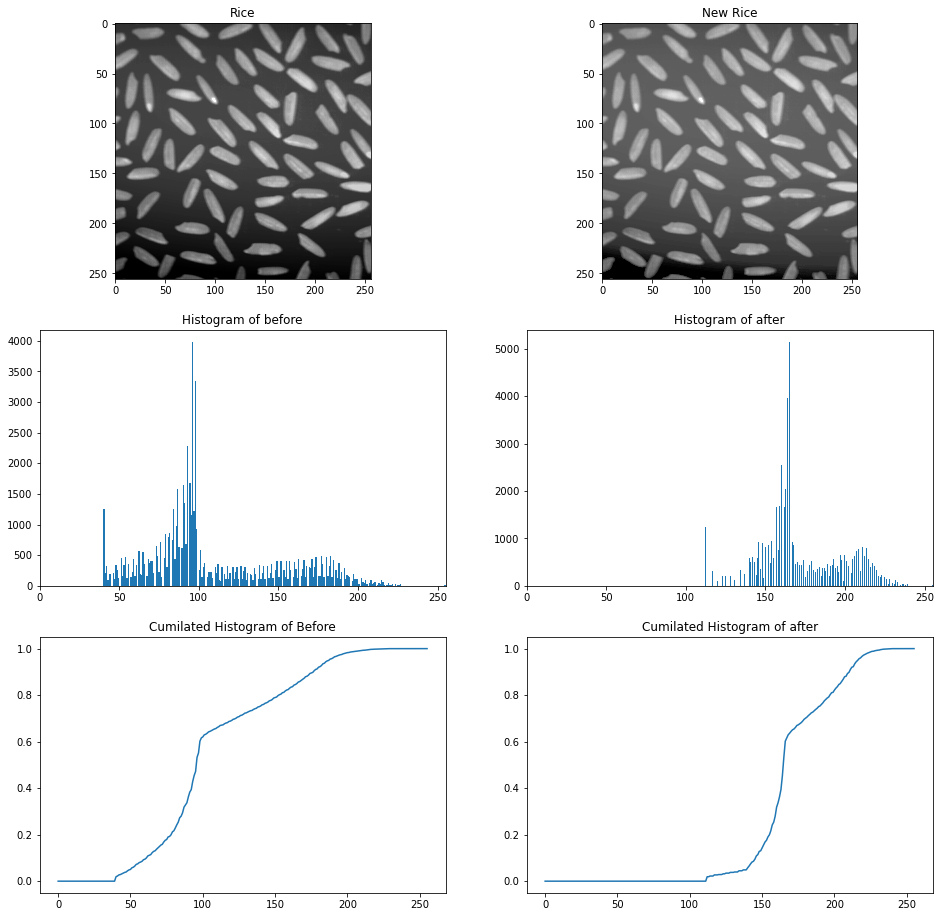

In [117]:
dilcon_rice = dil_con(rice_img,50,140)
plt.subplots(3,2,figsize=(16,16))
plt.subplot(3,2,1)
plt.imshow(rice_img,'gray')
plt.title('Rice')

plt.subplot(3,2,2)
plt.imshow(dilcon_rice,'gray')
plt.title('New Rice')

plt.subplot(3,2,3)
plt.hist(rice_img.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of before")

plt.subplot(3,2,4)
plt.hist(dilcon_rice.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of after")

plt.subplot(3,2,5)
plt.plot(cumilated_hist(rice_img)['Cumilative_Probability'])
plt.title('Cumilated Histogram of Before');

plt.subplot(3,2,6)
plt.plot(cumilated_hist(dilcon_rice)['Cumilative_Probability'])
plt.title('Cumilated Histogram of after');

plt.show()

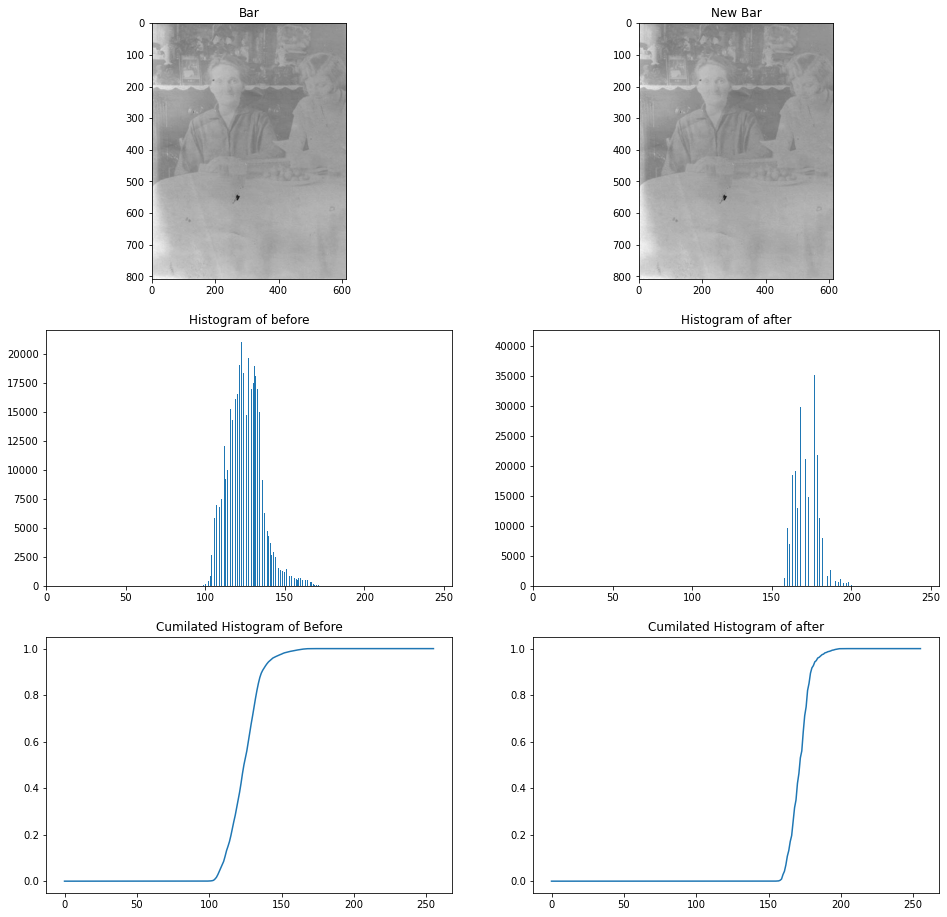

In [122]:
dilcon_bar = dil_con(bar_img,10,100)
plt.subplots(3,2,figsize=(16,16))
plt.subplot(3,2,1)
plt.imshow(bar_img,'gray')
plt.title('Bar')

plt.subplot(3,2,2)
plt.imshow(dilcon_bar,'gray')
plt.title('New Bar')

plt.subplot(3,2,3)
plt.hist(bar_img.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of before")

plt.subplot(3,2,4)
plt.hist(dilcon_bar.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of after")

plt.subplot(3,2,5)
plt.plot(cumilated_hist(bar_img)['Cumilative_Probability'])
plt.title('Cumilated Histogram of Before');

plt.subplot(3,2,6)
plt.plot(cumilated_hist(dilcon_bar)['Cumilative_Probability'])
plt.title('Cumilated Histogram of after');

plt.show()

# Contraction of bright areas and dilatation of dark ones

In [132]:
def dil_con_dark(img,a,b):
    new_img = np.zeros(shape = img.shape)
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            if img[row,column] > a :
                new_img[row,column] = int((b/a) * img[row,column])
            else:
                new_img[row,column] = int(((255-b)*img[row,column] + 255*(b-a)) / (255 - a))
    return new_img

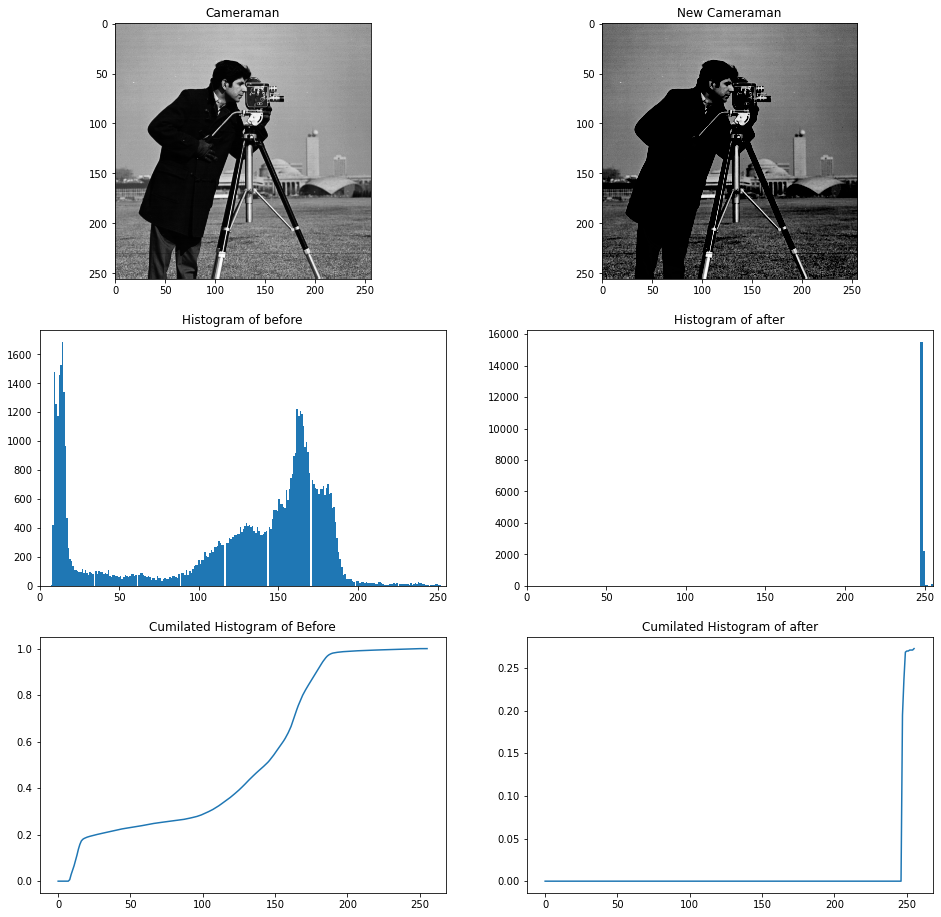

In [133]:
dilconDark_cameraman = dil_con_dark(cameraman_img,90,250)
plt.subplots(3,2,figsize=(16,16))
plt.subplot(3,2,1)
plt.imshow(cameraman_img,'gray')
plt.title('Cameraman')

plt.subplot(3,2,2)
plt.imshow(dilconDark_cameraman,'gray')
plt.title('New Cameraman')

plt.subplot(3,2,3)
plt.hist(cameraman_img.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of before")

plt.subplot(3,2,4)
plt.hist(dilconDark_cameraman.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of after")

plt.subplot(3,2,5)
plt.plot(cumilated_hist(cameraman_img)['Cumilative_Probability'])
plt.title('Cumilated Histogram of Before');

plt.subplot(3,2,6)
plt.plot(cumilated_hist(dilconDark_cameraman)['Cumilative_Probability'])
plt.title('Cumilated Histogram of after');

plt.show()

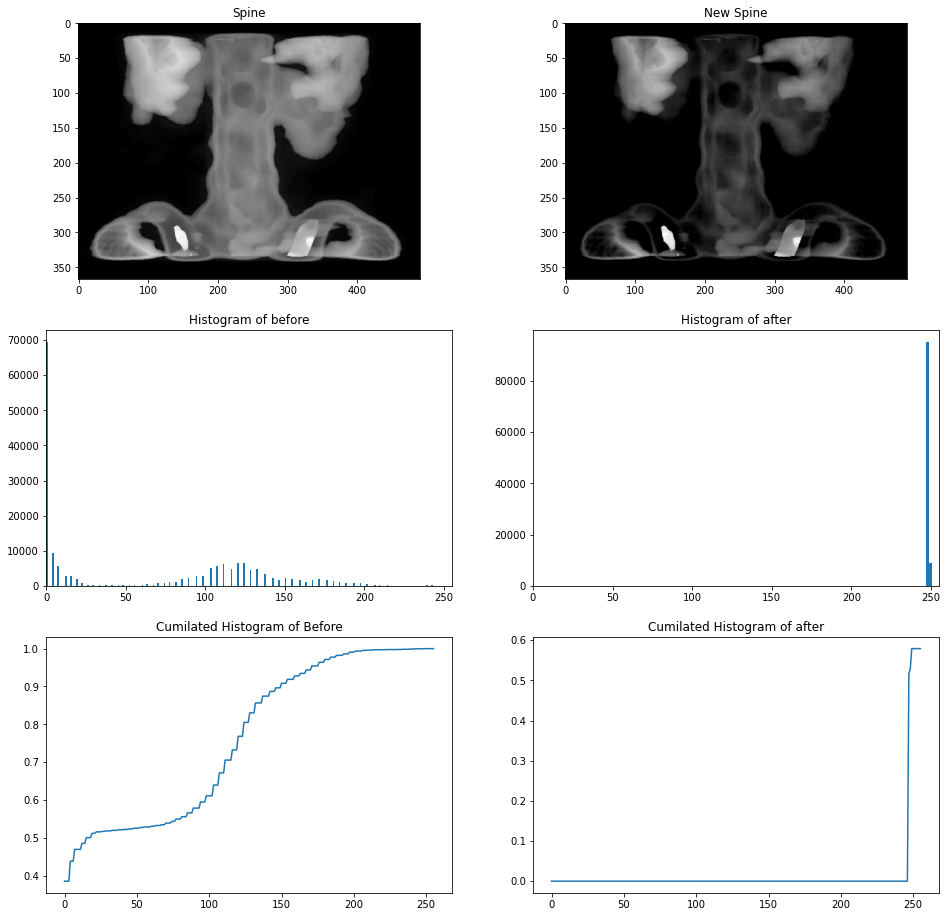

In [134]:
dilconDark_spine = dil_con_dark(spine_img,90,250)
plt.subplots(3,2,figsize=(16,16))
plt.subplot(3,2,1)
plt.imshow(spine_img,'gray')
plt.title('Spine')

plt.subplot(3,2,2)
plt.imshow(dilconDark_spine,'gray')
plt.title('New Spine')

plt.subplot(3,2,3)
plt.hist(spine_img.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of before")

plt.subplot(3,2,4)
plt.hist(dilconDark_spine.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of after")

plt.subplot(3,2,5)
plt.plot(cumilated_hist(spine_img)['Cumilative_Probability'])
plt.title('Cumilated Histogram of Before');

plt.subplot(3,2,6)
plt.plot(cumilated_hist(dilconDark_spine)['Cumilative_Probability'])
plt.title('Cumilated Histogram of after');

plt.show()

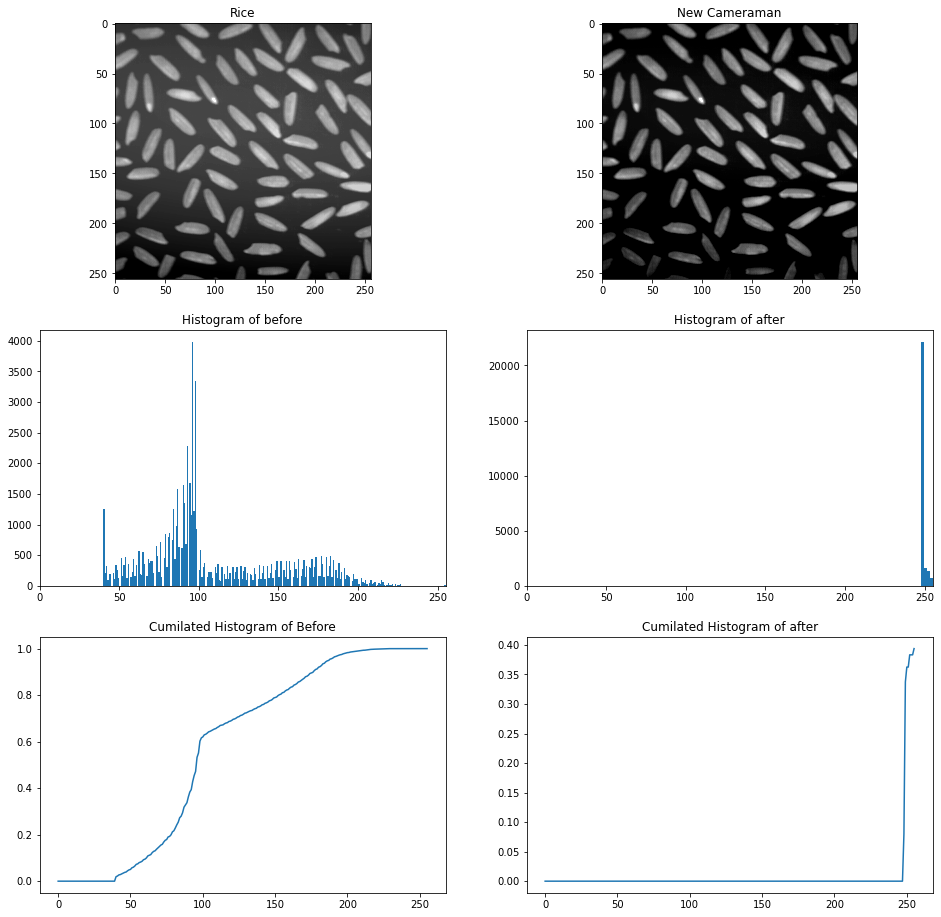

In [135]:
dilconDark_rice = dil_con_dark(rice_img,90,250)
plt.subplots(3,2,figsize=(16,16))
plt.subplot(3,2,1)
plt.imshow(rice_img,'gray')
plt.title('Rice')

plt.subplot(3,2,2)
plt.imshow(dilconDark_rice,'gray')
plt.title('New Cameraman')

plt.subplot(3,2,3)
plt.hist(rice_img.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of before")

plt.subplot(3,2,4)
plt.hist(dilconDark_rice.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of after")

plt.subplot(3,2,5)
plt.plot(cumilated_hist(rice_img)['Cumilative_Probability'])
plt.title('Cumilated Histogram of Before');

plt.subplot(3,2,6)
plt.plot(cumilated_hist(dilconDark_rice)['Cumilative_Probability'])
plt.title('Cumilated Histogram of after');

plt.show()

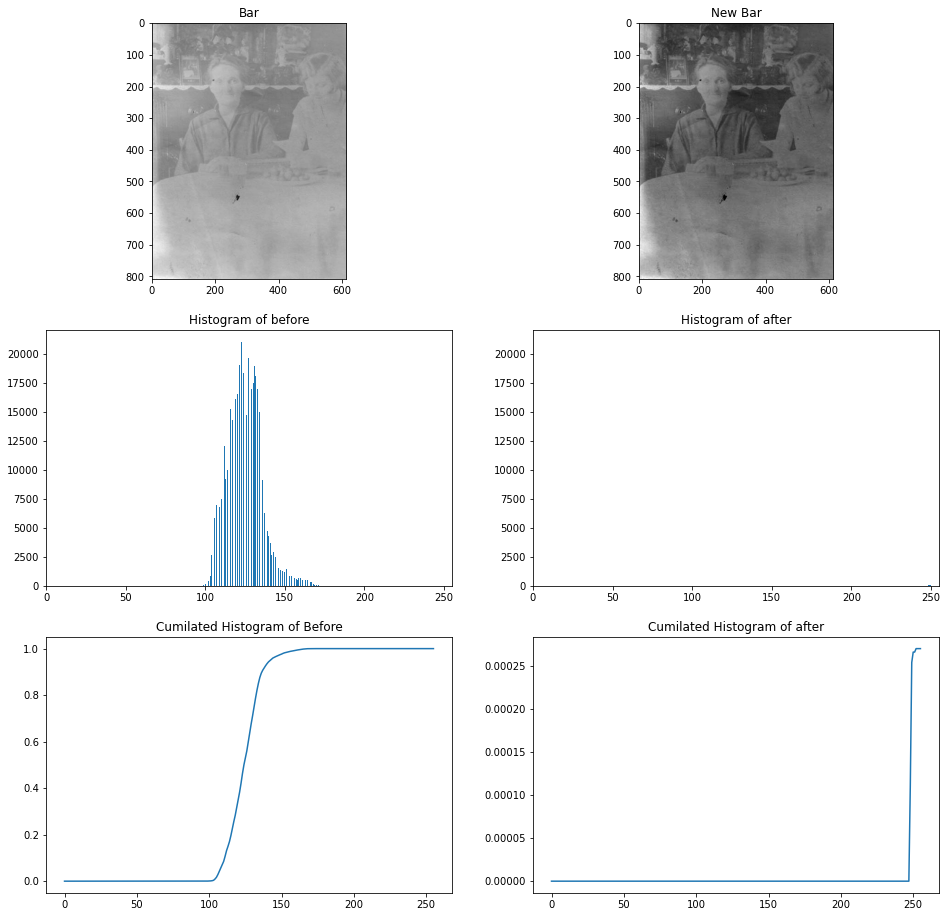

In [136]:
dilconDark_bar = dil_con_dark(bar_img,90,250)
plt.subplots(3,2,figsize=(16,16))
plt.subplot(3,2,1)
plt.imshow(bar_img,'gray')
plt.title('Bar')

plt.subplot(3,2,2)
plt.imshow(dilconDark_bar,'gray')
plt.title('New Bar')

plt.subplot(3,2,3)
plt.hist(bar_img.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of before")

plt.subplot(3,2,4)
plt.hist(dilconDark_bar.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of after")

plt.subplot(3,2,5)
plt.plot(cumilated_hist(bar_img)['Cumilative_Probability'])
plt.title('Cumilated Histogram of Before');

plt.subplot(3,2,6)
plt.plot(cumilated_hist(dilconDark_bar)['Cumilative_Probability'])
plt.title('Cumilated Histogram of after');

plt.show()

# Histogram equalization

In [177]:
def histeq_(img,L = 256):
    new_img = np.zeros(shape = img.shape)
    (M,N) = img.shape
    dic = {}
    dic['Cumilative_Probability'] = []
    cumilative_prob = 0
    
    for item in range(L):
        value = np.count_nonzero(img == item) 
        cumilative_prob += (value/(M*N))
        dic['Cumilative_Probability'].append(cumilative_prob)
    
    cumilative = pd.DataFrame(dic)
   
    
        
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):

            new_img[row,column] = round((L-1) * cumilative['Cumilative_Probability'][img[row,column]]) 
           
    return new_img

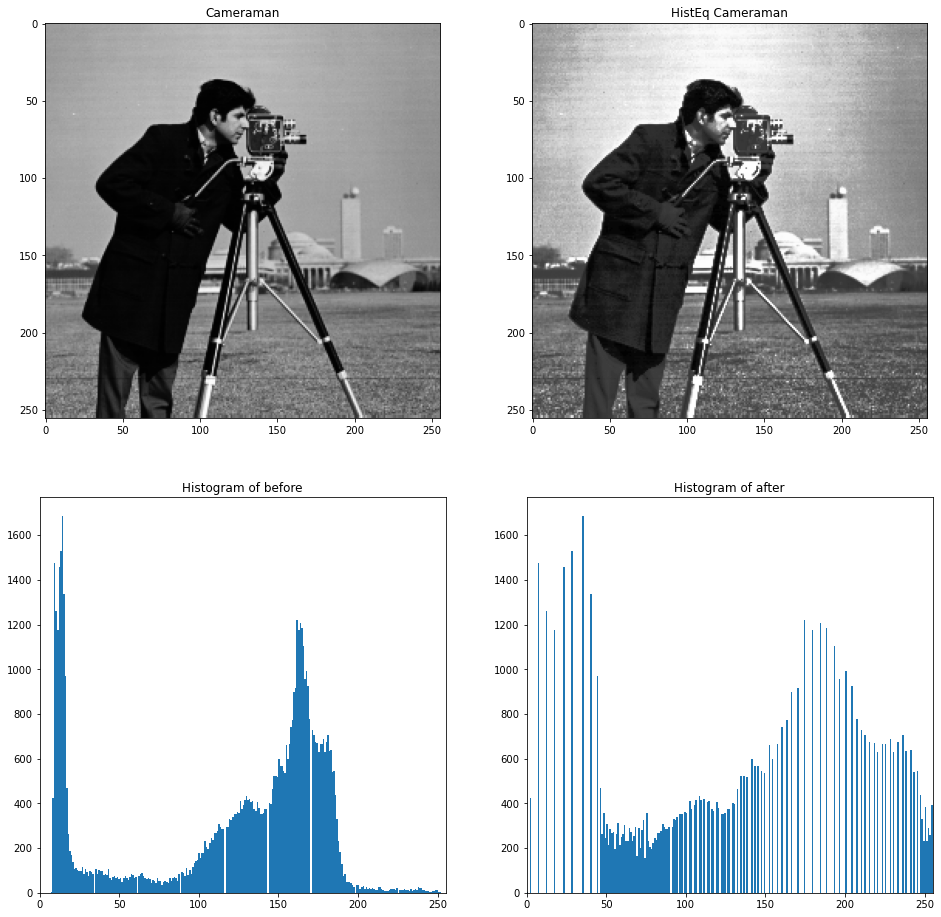

In [178]:
histeq_cameraman = histeq_(cameraman_img)
plt.subplots(2,2,figsize=(16,16))
plt.subplot(2,2,1)
plt.imshow(cameraman_img,'gray')
plt.title('Cameraman')

plt.subplot(2,2,2)
plt.imshow(histeq_cameraman,'gray')
plt.title('HistEq Cameraman')

plt.subplot(2,2,3)
plt.hist(cameraman_img.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of before")

plt.subplot(2,2,4)
plt.hist(histeq_cameraman.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of after")
plt.show()

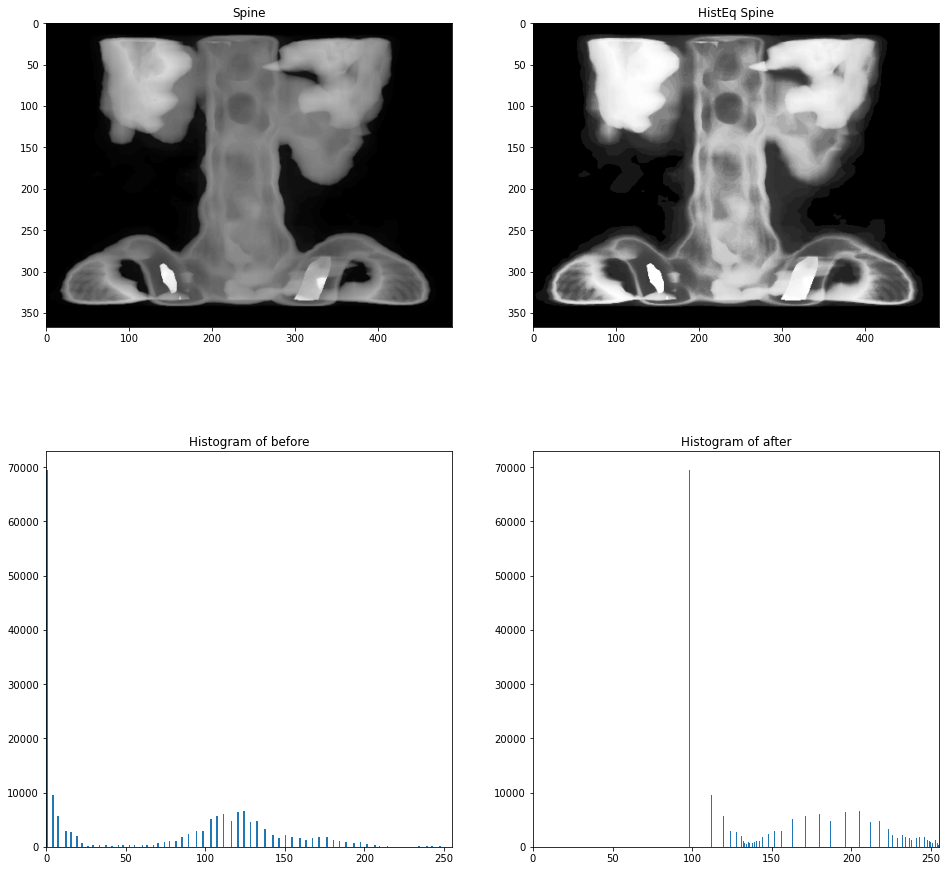

In [179]:
histeq_spine = histeq_(spine_img)
plt.subplots(2,2,figsize=(16,16))
plt.subplot(2,2,1)
plt.imshow(spine_img,'gray')
plt.title('Spine')

plt.subplot(2,2,2)
plt.imshow(histeq_spine,'gray')
plt.title('HistEq Spine')

plt.subplot(2,2,3)
plt.hist(spine_img.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of before")

plt.subplot(2,2,4)
plt.hist(histeq_spine.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of after")
plt.show()

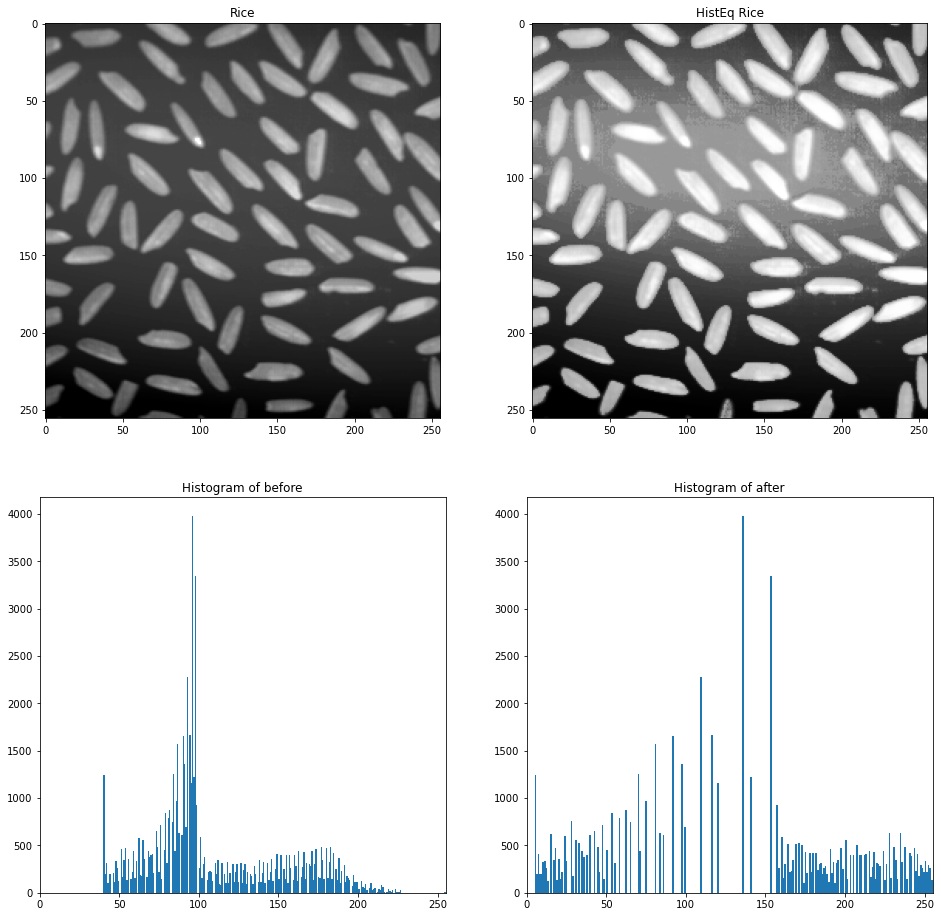

In [180]:
histeq_rice = histeq_(rice_img)
plt.subplots(2,2,figsize=(16,16))
plt.subplot(2,2,1)
plt.imshow(rice_img,'gray')
plt.title('Rice')

plt.subplot(2,2,2)
plt.imshow(histeq_rice,'gray')
plt.title('HistEq Rice')

plt.subplot(2,2,3)
plt.hist(rice_img.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of before")

plt.subplot(2,2,4)
plt.hist(histeq_rice.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of after")
plt.show()

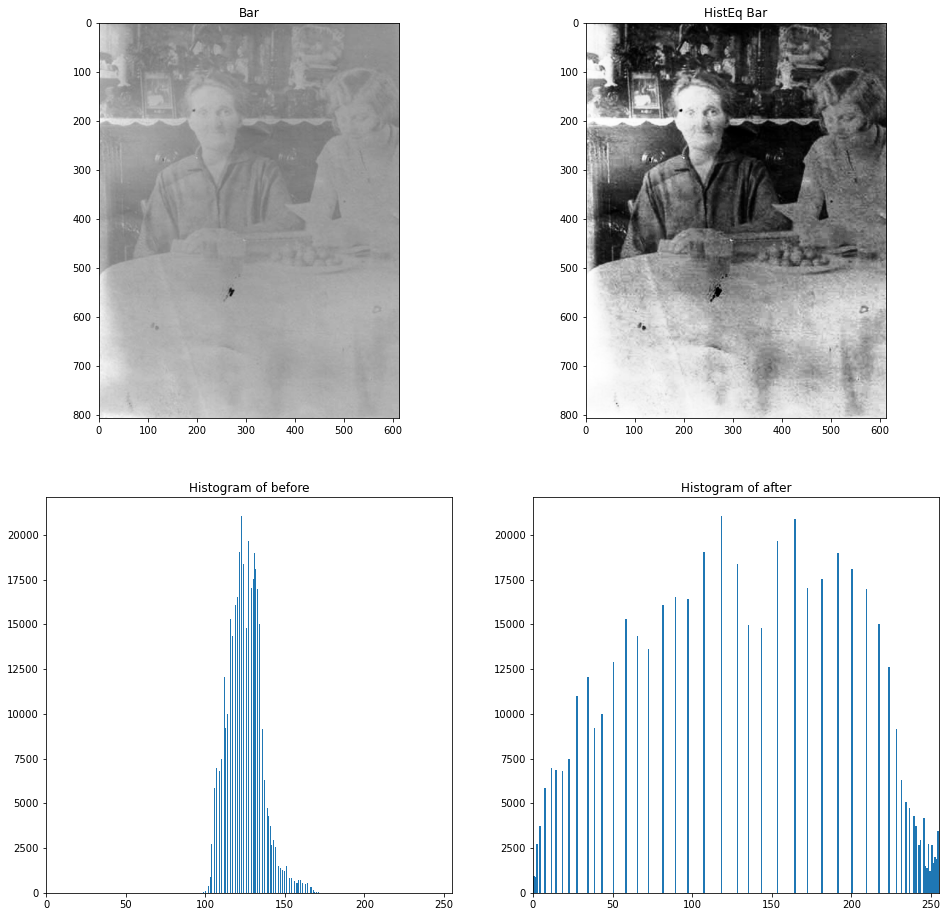

In [181]:
histeq_bar = histeq_(bar_img)
plt.subplots(2,2,figsize=(16,16))
plt.subplot(2,2,1)
plt.imshow(bar_img,'gray')
plt.title('Bar')

plt.subplot(2,2,2)
plt.imshow(histeq_bar,'gray')
plt.title('HistEq Bar')

plt.subplot(2,2,3)
plt.hist(bar_img.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of before")

plt.subplot(2,2,4)
plt.hist(histeq_bar.flatten(), bins=255)
plt.xlim([0,255])
plt.title("Histogram of after")
plt.show()